<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

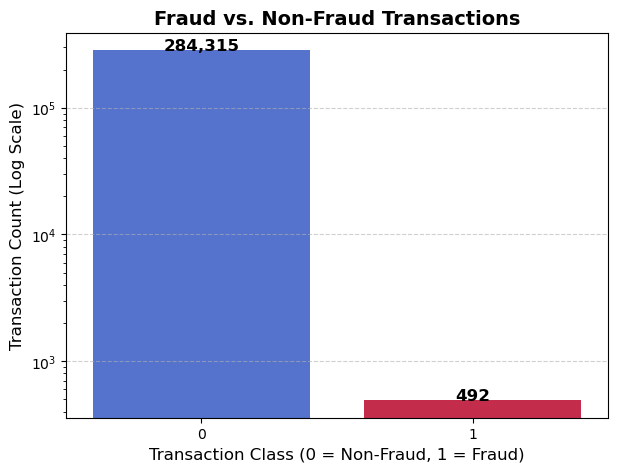

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os
import joblib  # For saving the trained model

# Load dataset with error handling
file_path = "creditcard.csv"

if not os.path.exists(file_path):
    print(f"Error: {file_path} not found. Place the CSV in the same directory as this notebook.")
else:
    df = pd.read_csv(file_path)
    
    # Exploratory Data Analysis (EDA)
    print(df.info())
    print(df.describe())
    print("Missing values per column:\n", df.isnull().sum())

    # Class Distribution Visualization
    plt.figure(figsize=(7,5))
    ax = sns.countplot(
        x="Class", 
        data=df, 
        hue="Class",
        palette={0: "royalblue", 1: "crimson"},  # Non-Fraud (Blue), Fraud (Red)
        legend=False
    )

    # Apply log scale for better visibility
    ax.set_yscale("log")

    # Annotate bars with exact counts
    total_counts = df["Class"].value_counts()
    for i, count in enumerate(total_counts):
        ax.text(i, count, f"{count:,}", ha="center", fontsize=12, color="black", fontweight="bold")

    # Labels and title
    plt.title("Fraud vs. Non-Fraud Transactions", fontsize=14, fontweight="bold")
    plt.xlabel("Transaction Class (0 = Non-Fraud, 1 = Fraud)", fontsize=12)
    plt.ylabel("Transaction Count (Log Scale)", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.6)  # Grid for readability
    plt.show()

    # Data Preprocessing
    scaler = StandardScaler()
    df['Amount'] = scaler.fit_transform(df[['Amount']])
    df = df.drop(columns=['Time'])

    # Splitting data into features and target
    X = df.drop(columns=['Class'])
    y = df['Class']

    # Handling Imbalance using SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Splitting dataset
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Model Training
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Model Evaluation
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Save model (optional for deployment)
    joblib.dump(model, "credit_card_fraud_model.pkl")

    print("Model training and evaluation completed successfully!")
